# Do Hubs Hurt?

In [1]:
%load_ext lab_black
%load_ext autotime
import numpy as np
import pandas as pd

time: 245 ms (started: 2022-09-30 14:37:06 -07:00)


As mentioned in the `hubness.ipynb` notebook, the paper [Hubs in Space: Popular Nearest Neighbors in High-Dimensional Data
](https://www.jmlr.org/papers/v11/radovanovic10a.html) made the case that hubness (where an item shows up in the neighbor list of other items at much more than expected) can affect many aspects of machine learning including some related to dimensionality reduction, such as clustering. When they consider dimensionality reduction, they conclude:

> If one still chooses to apply aggressive dimensionality reduction and let the resulting number of features fall below intrinsic dimensionality, it can be expected of [...] hubness to be reduced or even lost. Whether these effects should be actively avoided or sought really depends on [...] whether and to what degree the original pairwise distances represent valuable information

A dataset with a very high hubness is the `macosko2015` scRNAseq dataset, which does not look very good under typical dimensionality reduction cases. After PCA to 50 dimensions, though, it does look a lot more clustered. And indeed the hubness is massively reduced after PCA. Tentatively, I would like to present this as evidence of hubness hurting dimensionality reduction. The difference seems to be due to the nearest neighbor graph that results after PCA, but not the weights of those edges.

## macosko2015: PCA vs no PCA

Let's look at `macosko2015` without PCA being applied, using very default t-SNE settings. No legend shown because the identification of clusters isn't important for what we are going to do.

In [2]:
import seaborn as sns

import drnb.embed.pipeline as pl

sns.set_style("dark")

plot_params = dict(cex=3, alpha_scale=0.1, figsize=(6, 4), legend=False)

tsne_perp30 = pl.create_pipeline(
    method=pl.embedder("tsne", params=dict(perplexity=30)),
    plot=plot_params,
)

time: 4.19 s (started: 2022-09-30 14:37:07 -07:00)


[14:37:13] INFO     KNN index provided. Ignoring KNN-related parameters.                            ]8;id=663586;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=971286;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py#186\186]8;;\

[14:37:15] INFO     Precomputed affinities provided. Ignoring perplexity-related parameters.           ]8;id=713986;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=659181;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1321\1321]8;;\

           INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=417337;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=553610;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1329\1329]8;;\

[14:37:18] INFO     Automatically determined negative gradient method `fft`                              ]8;id=746740;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=96739;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[14:37:36] INFO     Automatically determined negative gradient method `fft`                              ]8;id=379521;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=444224;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

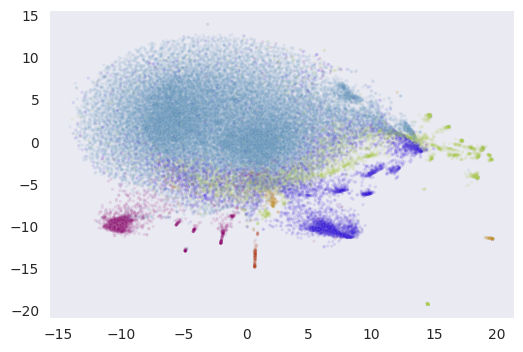

time: 1min 1s (started: 2022-09-30 14:37:11 -07:00)


In [3]:
macosko2015_perp30 = tsne_perp30.run("macosko2015")

This looks ok, but you can see a the large cyan cluster is swallowing a lot of the blue and green points. Now the version where the data was pre-processed by using the first 50 components:

[14:38:13] INFO     KNN index provided. Ignoring KNN-related parameters.                            ]8;id=404238;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=459110;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py#186\186]8;;\

[14:38:14] INFO     Precomputed affinities provided. Ignoring perplexity-related parameters.           ]8;id=750837;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=93991;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1321\1321]8;;\

           INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=270577;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=527810;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1329\1329]8;;\

[14:38:15] INFO     Automatically determined negative gradient method `fft`                              ]8;id=32874;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=613981;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[14:38:31] INFO     Automatically determined negative gradient method `fft`                              ]8;id=147328;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=394632;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

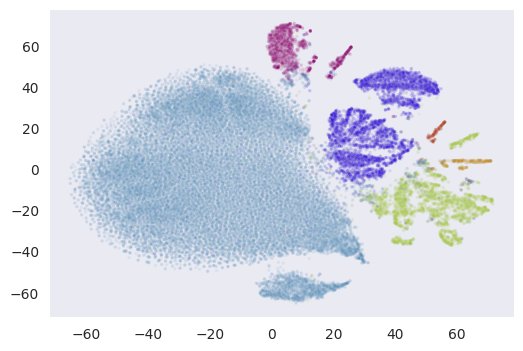

time: 1min 1s (started: 2022-09-30 14:38:13 -07:00)


In [4]:
macosko2015pca_perp30 = tsne_perp30.run("macosko2015-pca50")

This just looks a lot better. I leave the question of whether it represents biological reality to one side, it's just hard to argue that the non-PCA version shows better clustering. What makes the difference? I can think of a few possibilities:

1. The initialization is different. Probably not in this case, as openTSNE defaults to using the first two Principal Components. So that should be the same.
1. The nearest neighbor graph is different. Definitely the case here because as we saw in the previous notebook, the nearest neighbors data for `macosko2015` and `macosko2015-pca` have very different hubness values and k-occurrence distributions.
1. The distances create very different affinity values. This could be playing a role too. If the neighbors are different, then the distances will be different which will lead to different affinity values.

So we should try to rule out 2 or 3. Below I will show strong evidence that the source of the difference is the nearest neighbor graph (2), but that the edge weights (3) have basically no affect.

## The MNIST case

Effectively, the case for point 3 has been made already in [Attraction-Repulsion Spectrum in Neighbor Embeddings](https://www.jmlr.org/papers/v23/21-0055.html). There (in figure 2 to be precise) the authors note that running t-SNE on MNIST with uniform affinities and 15 nearest neighbors gives results which look just like the usual perplexity-based result with `perplexity = 30`. I have no reason to doubt them, but let's just check we can get that via the affordances provided by `drnb`.

[14:39:15] INFO     KNN index provided. Ignoring KNN-related parameters.                            ]8;id=191026;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=284913;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py#186\186]8;;\

[14:39:18] INFO     Precomputed affinities provided. Ignoring perplexity-related parameters.           ]8;id=993948;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=447457;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1321\1321]8;;\

           INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=387069;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=571854;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1329\1329]8;;\

[14:39:20] INFO     Automatically determined negative gradient method `fft`                              ]8;id=727240;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=198130;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[14:39:42] INFO     Automatically determined negative gradient method `fft`                              ]8;id=531840;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=367375;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

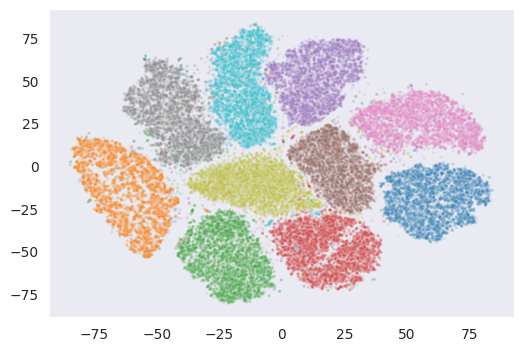

time: 1min 37s (started: 2022-09-30 14:39:14 -07:00)


In [5]:
mnist_perp30 = tsne_perp30.run("mnist")

In [6]:
tsne_unif15 = pl.create_pipeline(
    method=pl.embedder("tsne", n_neighbors=15, affinity="uniform"),
    plot=plot_params,
)

time: 1.58 ms (started: 2022-09-30 14:40:51 -07:00)


[14:40:52] INFO     KNN index provided. Ignoring KNN-related parameters.                           ]8;id=69569;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=829384;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py#1175\1175]8;;\

           INFO     Precomputed affinities provided. Ignoring perplexity-related parameters.           ]8;id=63431;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=396582;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1321\1321]8;;\

           INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=191013;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=234926;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1329\1329]8;;\

[14:40:54] INFO     Automatically determined negative gradient method `fft`                              ]8;id=433818;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=121654;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[14:41:03] INFO     Automatically determined negative gradient method `fft`                              ]8;id=653593;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=88056;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

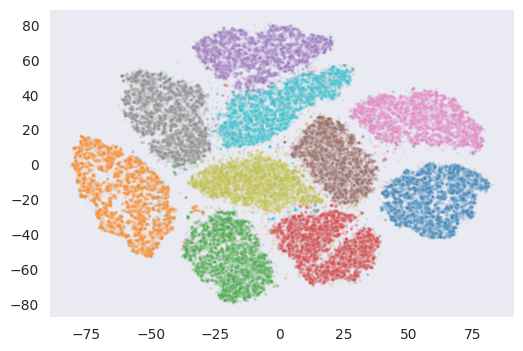

time: 52.6 s (started: 2022-09-30 14:40:51 -07:00)


In [7]:
mnist_unif15 = tsne_unif15.run("mnist")

Yeah, that's pretty good. The 4/7/9 clusters at the top shift a bit, but that's par for the course. So that's the baseline sorted. At least in this case, affinity doesn't seem to matter. Unfortunately, I don't know a general rule of thumb for how to translate from perplexity to number of neighbors (divide by two?) so I will stick with `perplexity=30, n_neighbors=15` for the rest of this discussion.

## The macosko2015 case

Let's try using uniform affinities with the `macosko2015` and `macosko2015-pca50`:

[14:41:45] INFO     KNN index provided. Ignoring KNN-related parameters.                           ]8;id=661505;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=181341;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py#1175\1175]8;;\

           INFO     Precomputed affinities provided. Ignoring perplexity-related parameters.           ]8;id=515784;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=858987;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1321\1321]8;;\

           INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=151774;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=68258;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1329\1329]8;;\

[14:41:48] INFO     Automatically determined negative gradient method `fft`                              ]8;id=953217;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=646735;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[14:41:55] INFO     Automatically determined negative gradient method `fft`                              ]8;id=366253;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=957822;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

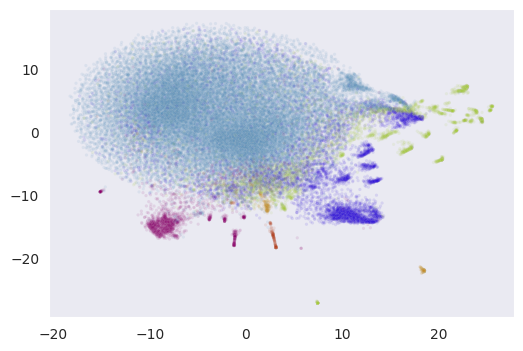

time: 26.3 s (started: 2022-09-30 14:41:44 -07:00)


In [8]:
macosko2015_unif15 = tsne_unif15.run("macosko2015")

[14:42:10] INFO     KNN index provided. Ignoring KNN-related parameters.                           ]8;id=698289;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=573132;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py#1175\1175]8;;\

           INFO     Precomputed affinities provided. Ignoring perplexity-related parameters.           ]8;id=869374;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=412337;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1321\1321]8;;\

           INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=97608;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=327481;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1329\1329]8;;\

[14:42:11] INFO     Automatically determined negative gradient method `fft`                              ]8;id=921414;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=204488;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[14:42:17] INFO     Automatically determined negative gradient method `fft`                              ]8;id=600058;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=833480;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

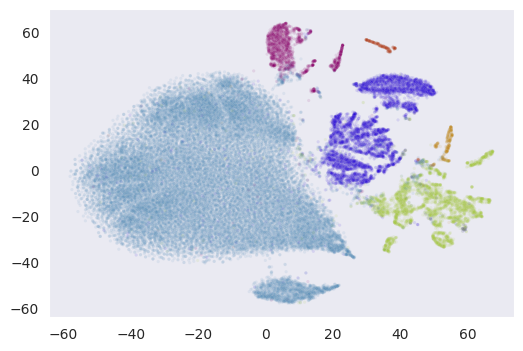

time: 33.8 s (started: 2022-09-30 14:42:10 -07:00)


In [9]:
macosko2015pca_unif15 = tsne_unif15.run("macosko2015-pca50")

You will have to scroll up a bit, but yes they look like the previous results. Using uniform affinity does seem to give the same results as the perplexity based affinity. So that really looks like the difference between these two plots is down to PCA giving a different set of nearest neighbors and nothing to do with the distances *per se*.

## Doing this the long way

To prove to myself that this is definitely correct, here I am going to manually build the t-SNE results in this notebook so I can see that no differences creep in elsewhere. Specifically I am going to:

* get the PCA nearest neighbors
* regenerate the distances for those nearest neighbors using the original non PCA `macosko2015` data
* show that both the uniform affinity and the perplexity-based affinity give the same nice results, without the `macosko2015-pca50` distances being involved at any point.

## Load data

In [10]:
import drnb.io.dataset as nbdata

macosko2015 = nbdata.read_data("macosko2015")
macosko2015pca50 = nbdata.read_data("macosko2015-pca50")

time: 636 ms (started: 2022-09-30 14:42:44 -07:00)


## Initialization

In [11]:
import openTSNE

macosko_init = openTSNE.initialization.pca(macosko2015)

time: 3.47 s (started: 2022-09-30 14:42:45 -07:00)


## Affinity Functions

And here is some code to read some neighbors and then create the `openTSNE.affinity` objects:

In [12]:
import openTSNE.nearest_neighbors as tsnenn

import drnb.neighbors as nbnbrs


def get_nbrs(name, n_neighbors=15):
    return nbnbrs.read_neighbors(
        name,
        n_neighbors=n_neighbors + 1,
        exact=True,
    )


def unif_aff(name, n_neighbors=15):
    nbrs = get_nbrs(name, n_neighbors=n_neighbors)
    knn = tsnenn.PrecomputedNeighbors(nbrs.idx[:, 1:], nbrs.dist[:, 1:])
    return openTSNE.affinity.Uniform(knn_index=knn)


def perp_aff(name, perplexity=30):
    nbrs = get_nbrs(name, n_neighbors=perplexity * 3)
    knn = tsnenn.PrecomputedNeighbors(nbrs.idx[:, 1:], nbrs.dist[:, 1:])
    return openTSNE.affinity.PerplexityBasedNN(knn_index=knn, perplexity=perplexity)

time: 5.96 ms (started: 2022-09-30 14:42:48 -07:00)


### Prep plot

I have abandoned the `macosko2015` palette, and am using the [ColorBrewer Set3](https://colorbrewer2.org/#type=qualitative&scheme=Set3&n=12) palette. I think it's a bit easier to see the different categories. You may think otherwise. There just aren't that many legible 12-color qualitative palettes, sorry.

In [13]:
from drnb.plot import sns_embed_plot

macosko2015_target = nbdata.read_target("macosko2015")

plot_kwds = dict(
    color_col=macosko2015_target,
    cex=4,
    alpha_scale=0.5,
    figsize=(9, 6),
    palette="Set3",
)

time: 35 ms (started: 2022-09-30 14:42:48 -07:00)


### create TSNE embedder

this plucky little `tsne` object will be doing a lot of work for us.

In [14]:
tsne = openTSNE.TSNE(n_components=2)

time: 884 µs (started: 2022-09-30 14:42:48 -07:00)


## Reproduce what we already know

This is just to show that all of the above gets us output that looks like what we had before.

### macosko2015 u15

[14:42:48] INFO     KNN index provided. Ignoring KNN-related parameters.                           ]8;id=89319;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=915433;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py#1175\1175]8;;\

           INFO     Precomputed affinities provided. Ignoring perplexity-related parameters.           ]8;id=48425;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=514614;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1321\1321]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=763168;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=641810;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[14:42:55] INFO     Automatically determined negative gradient method `fft`                              ]8;id=532259;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=551816;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

<AxesSubplot:>

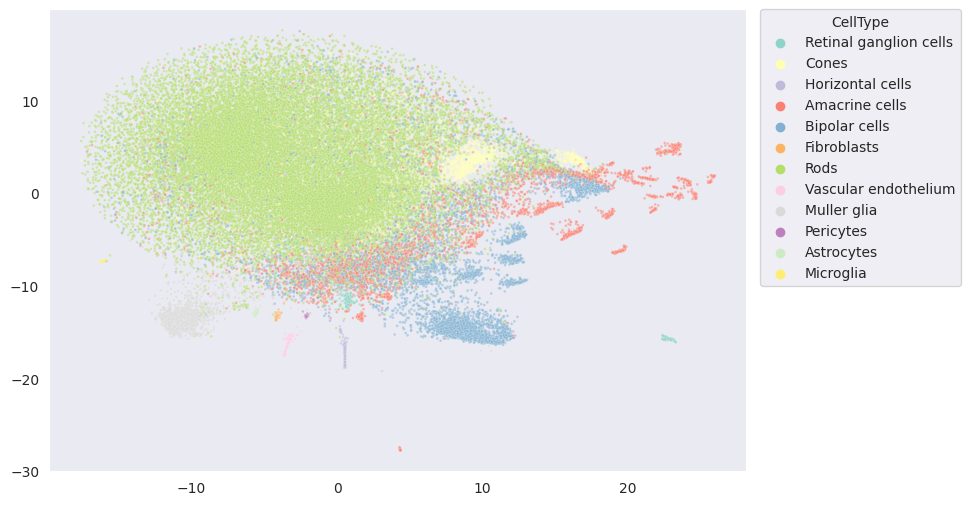

time: 22.6 s (started: 2022-09-30 14:42:48 -07:00)


In [15]:
macosko2015_15nbrs_uaff = unif_aff("macosko2015", 15)
macosko2015_tsneu = tsne.fit(
    affinities=macosko2015_15nbrs_uaff,
    initialization=macosko_init,
)
sns_embed_plot(macosko2015_tsneu, **plot_kwds)

### macosko2015 p30

[14:43:11] INFO     KNN index provided. Ignoring KNN-related parameters.                            ]8;id=658367;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=652241;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py#186\186]8;;\

[14:43:12] INFO     Precomputed affinities provided. Ignoring perplexity-related parameters.           ]8;id=407504;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=596703;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1321\1321]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=918309;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=162269;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[14:43:30] INFO     Automatically determined negative gradient method `fft`                              ]8;id=215777;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=530438;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

<AxesSubplot:>

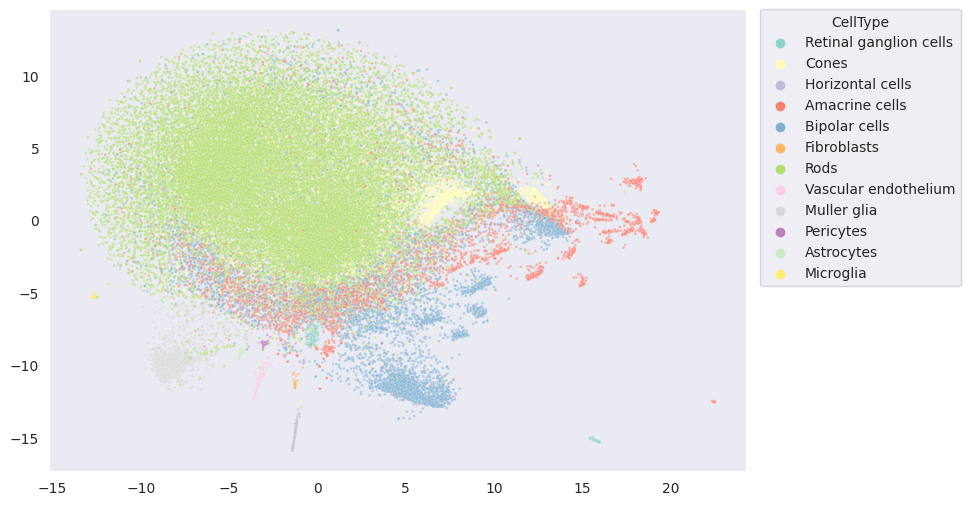

time: 55.1 s (started: 2022-09-30 14:43:11 -07:00)


In [16]:
macosko2015_90nbrs_paff = perp_aff("macosko2015", 30)
macosko2015_tsnep = tsne.fit(
    affinities=macosko2015_90nbrs_paff,
    initialization=macosko_init,
)
sns_embed_plot(macosko2015_tsnep, **plot_kwds)

### macosko2015 pca50 u15

[14:44:06] INFO     KNN index provided. Ignoring KNN-related parameters.                           ]8;id=36025;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=767720;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py#1175\1175]8;;\

           INFO     Precomputed affinities provided. Ignoring perplexity-related parameters.           ]8;id=387304;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=682756;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1321\1321]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=150780;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=270822;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[14:44:12] INFO     Automatically determined negative gradient method `fft`                              ]8;id=158488;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=139031;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

<AxesSubplot:>

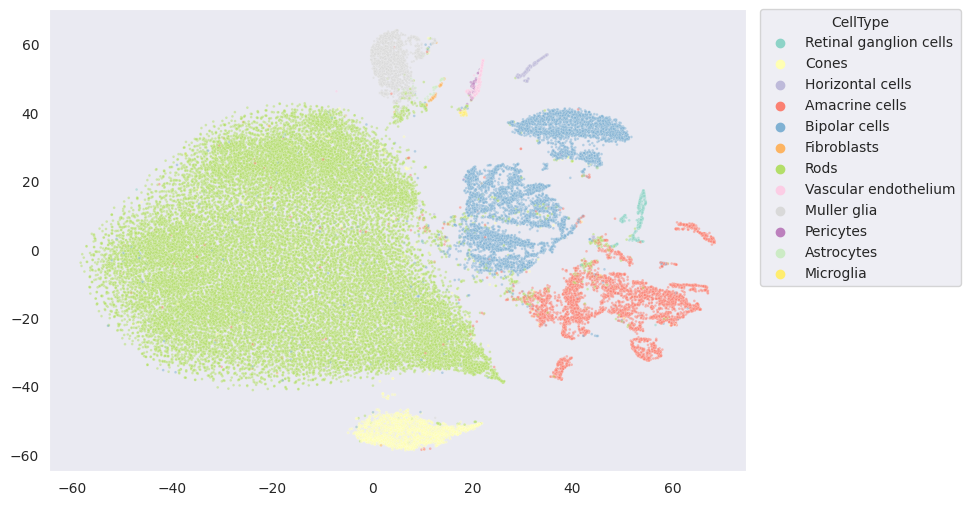

time: 33.6 s (started: 2022-09-30 14:44:06 -07:00)


In [17]:
macosko2015pca50_15nbrs_uaff = unif_aff("macosko2015-pca50", 15)
macosko2015pca50_tsneu = tsne.fit(
    affinities=macosko2015pca50_15nbrs_uaff,
    initialization=macosko_init,
)
sns_embed_plot(macosko2015pca50_tsneu, **plot_kwds)

### macosko2015 pca50 p30

[14:44:40] INFO     KNN index provided. Ignoring KNN-related parameters.                            ]8;id=114985;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=362834;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py#186\186]8;;\

[14:44:41] INFO     Precomputed affinities provided. Ignoring perplexity-related parameters.           ]8;id=25660;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=552656;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1321\1321]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=497847;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=467200;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[14:44:56] INFO     Automatically determined negative gradient method `fft`                              ]8;id=933871;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=711818;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

<AxesSubplot:>

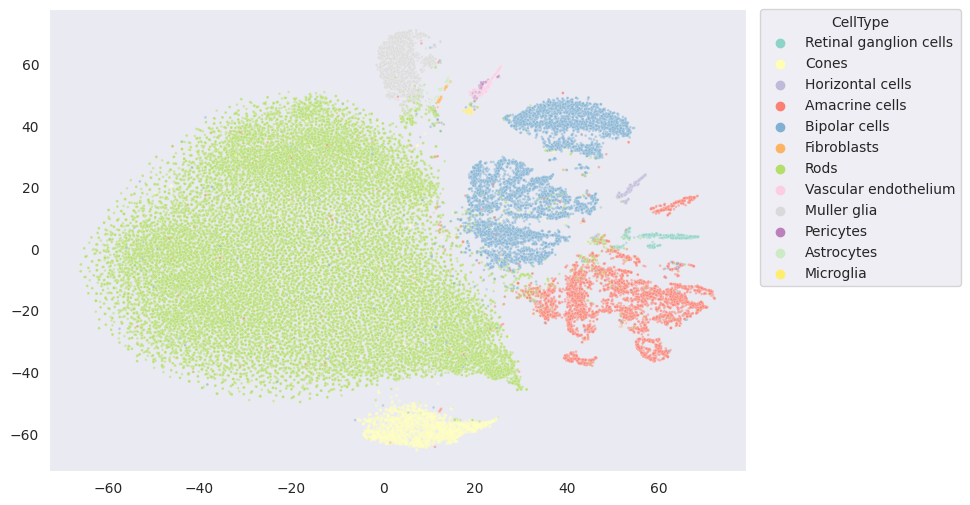

time: 1min (started: 2022-09-30 14:44:39 -07:00)


In [18]:
macosko2015pca50_90nbrs_paff = perp_aff("macosko2015-pca50", 30)
macosko2015pca50_tsnep = tsne.fit(
    affinities=macosko2015pca50_90nbrs_paff, initialization=macosko_init
)
sns_embed_plot(macosko2015pca50_tsnep, **plot_kwds)

Alright, that was a lot of code but at least we know it's all working like it should be.

## Use PCA50 neighbor indices with non-PCA data

The main new thing we need to do here is:

* load both the PCA50 and non-PCA neighbor data.
* recalculate the distances between the neighbors used by the PCA50 indices, using the original non-PCA data. For that we will need the help of some numba code and the distance function already available thanks to `pynndescent`.

### Distance transfer code

In [19]:
from numba import jit, prange
from pynndescent.distances import euclidean


@jit(nopython=True, parallel=True)
def idx_to_dist(idx, data):
    n_items = idx.shape[0]
    n_neighbors = idx.shape[1]
    dist = np.empty(dtype=np.float32, shape=idx.shape)
    for i in prange(n_items):
        for j in range(n_neighbors):
            dist[i, j] = euclidean(data[i], data[idx[i, j]])

    return dist

time: 9.36 ms (started: 2022-09-30 14:45:40 -07:00)


### PCA donation code

The following functions are like the `unif_aff` and `perp_aff` functions above, but use the PCA data to get new nearest neighbor data.

In [22]:
def unif_aff_pca_donor(name, data, n_neighbors=15):
    nbrs = get_nbrs(name, n_neighbors=n_neighbors)
    nbrs_pca = get_nbrs(f"{name}-pca50", n_neighbors=n_neighbors)

    nbr_dist = idx_to_dist(nbrs_pca.idx, data)
    knn = tsnenn.PrecomputedNeighbors(nbrs_pca.idx[:, 1:], nbr_dist[:, 1:])
    return openTSNE.affinity.Uniform(knn_index=knn)


def perp_aff_pca_donor(name, data, perplexity=30):
    nbrs_orig = get_nbrs(name, n_neighbors=perplexity * 3)
    nbrs_pca = get_nbrs(f"{name}-pca50", n_neighbors=perplexity * 3)

    nbr_dist = idx_to_dist(nbrs_pca.idx, data)
    knn = tsnenn.PrecomputedNeighbors(nbrs_pca.idx[:, 1:], nbr_dist[:, 1:])
    return openTSNE.affinity.PerplexityBasedNN(knn_index=knn, perplexity=perplexity)

time: 4.94 ms (started: 2022-09-30 14:48:51 -07:00)


We are now ready to see this all in action.

### macosko2015 u15 donated from PCA

[14:49:06] INFO     KNN index provided. Ignoring KNN-related parameters.                           ]8;id=744531;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=941226;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py#1175\1175]8;;\

           INFO     Precomputed affinities provided. Ignoring perplexity-related parameters.           ]8;id=454552;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=975843;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1321\1321]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=973208;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=452586;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[14:49:12] INFO     Automatically determined negative gradient method `fft`                              ]8;id=827290;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=454649;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

<AxesSubplot:>

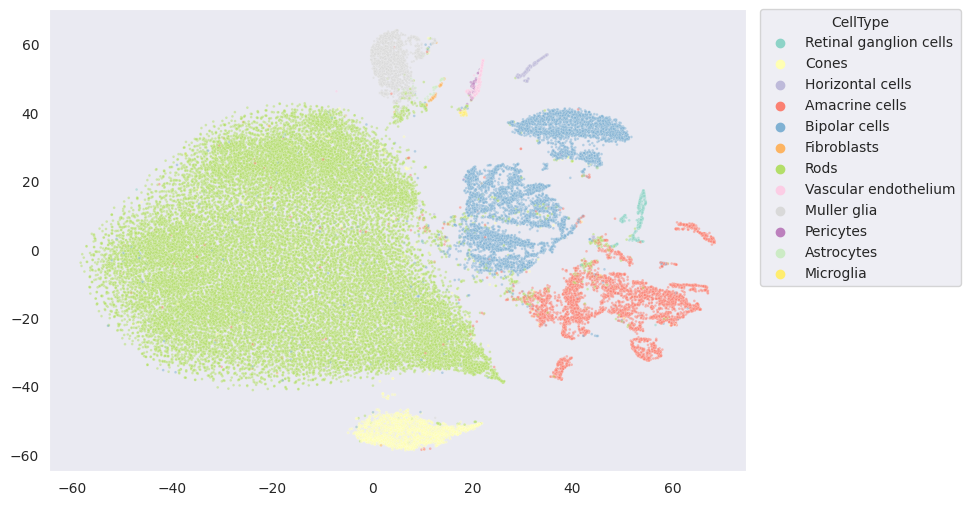

time: 32.7 s (started: 2022-09-30 14:49:05 -07:00)


In [23]:
macosko2015_15nbrs_uaffd = unif_aff_pca_donor("macosko2015", macosko2015, 15)
macosko2015_tsneud = tsne.fit(
    affinities=macosko2015_15nbrs_uaffd,
    initialization=macosko_init,
)
sns_embed_plot(macosko2015_tsneud, **plot_kwds)

### macosko2015 p30 donated from PCA

[14:49:48] INFO     KNN index provided. Ignoring KNN-related parameters.                            ]8;id=750140;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=780968;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py#186\186]8;;\

[14:49:49] INFO     Precomputed affinities provided. Ignoring perplexity-related parameters.           ]8;id=528323;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=577679;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1321\1321]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=853397;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=780922;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[14:50:04] INFO     Automatically determined negative gradient method `fft`                              ]8;id=83787;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=923418;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

<AxesSubplot:>

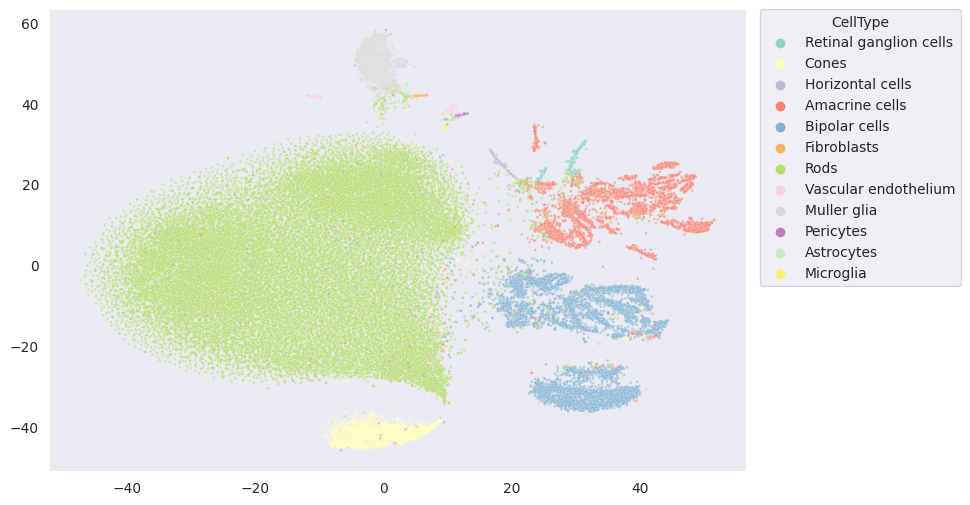

time: 58.3 s (started: 2022-09-30 14:49:44 -07:00)


In [24]:
macosko2015_15nbrs_paffd = perp_aff_pca_donor("macosko2015", macosko2015, 30)
macosko2015_tsnepd = tsne.fit(
    affinities=macosko2015_15nbrs_paffd,
    initialization=macosko_init,
)
sns_embed_plot(macosko2015_tsnepd, **plot_kwds)

So there it is. We *can* get results in the non-PCA `macosko2015` dataset that look as good as the PCA version. The *only* thing we need from the PCA results is the choice of the nearest neighbor indices. The *distances* are irrelevant.

So what remains to understand is why in this case the PCA neighbor indices are better. Is it because the hubness is drastically reduced? Is it because of the way PCA with 50 dimensions works on the distances in the original ambient case and the reduction of hubness is just a side effect?

In [25]:
tsne_perp50 = pl.create_pipeline(
    method=pl.embedder("tsne", params=dict(perplexity=50)),
    plot=plot_params,
)

time: 1.85 ms (started: 2022-09-30 14:50:57 -07:00)


[14:51:01] INFO     KNN index provided. Ignoring KNN-related parameters.                            ]8;id=270026;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=942660;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py#186\186]8;;\

[14:51:05] INFO     Precomputed affinities provided. Ignoring perplexity-related parameters.           ]8;id=742651;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=563823;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1321\1321]8;;\

           INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=586935;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=303422;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1329\1329]8;;\

[14:51:10] INFO     Automatically determined negative gradient method `fft`                              ]8;id=445338;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=630468;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[14:51:46] INFO     Automatically determined negative gradient method `fft`                              ]8;id=484067;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=32738;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

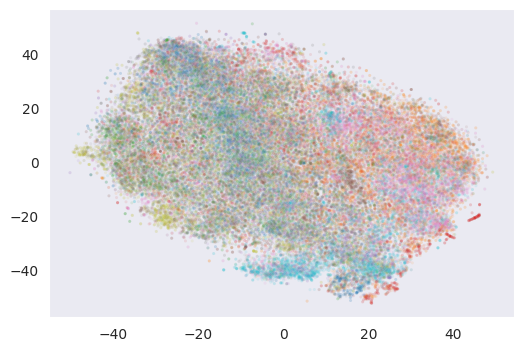

time: 2min 7s (started: 2022-09-30 14:50:58 -07:00)


In [26]:
cifar10_perp50 = tsne_perp50.run("cifar10")

[14:53:06] INFO     KNN index provided. Ignoring KNN-related parameters.                            ]8;id=736678;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=515634;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py#186\186]8;;\

[14:53:10] INFO     Precomputed affinities provided. Ignoring perplexity-related parameters.           ]8;id=651223;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=652505;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1321\1321]8;;\

           INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=391705;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=622409;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1329\1329]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=505376;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=189230;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[14:53:45] INFO     Automatically determined negative gradient method `fft`                              ]8;id=169383;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=553791;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

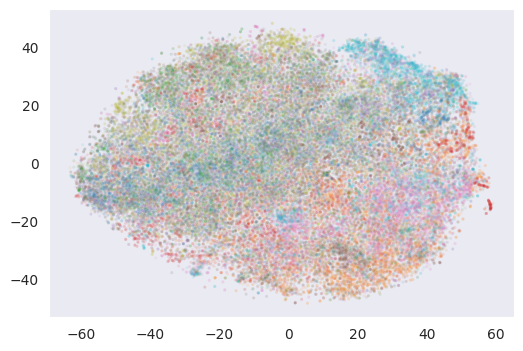

time: 2min 4s (started: 2022-09-30 14:53:06 -07:00)


In [27]:
cifar10_perp50 = tsne_perp50.run("cifar10-pca50")

[14:55:10] INFO     KNN index provided. Ignoring KNN-related parameters.                           ]8;id=514681;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=392012;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py#1175\1175]8;;\

           INFO     Precomputed affinities provided. Ignoring perplexity-related parameters.           ]8;id=155444;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=186989;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1321\1321]8;;\

           INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=583124;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=351544;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1329\1329]8;;\

           INFO     Automatically determined negative gradient method `bh`                               ]8;id=523503;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=512924;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[14:55:14] INFO     Automatically determined negative gradient method `bh`                               ]8;id=447558;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=775510;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

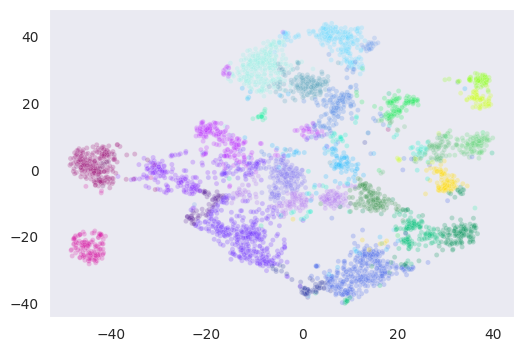

time: 9.77 s (started: 2022-09-30 14:55:10 -07:00)


In [28]:
tsne_unif15 = pl.create_pipeline(
    method=pl.embedder("tsne", n_neighbors=15, affinity="uniform"),
    plot=dict(figsize=(6, 4)),
)
_ = tsne_unif15.run("lamanno2020")

[14:55:20] INFO     KNN index provided. Ignoring KNN-related parameters.                           ]8;id=827978;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=530448;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py#1175\1175]8;;\

           INFO     Precomputed affinities provided. Ignoring perplexity-related parameters.           ]8;id=18652;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=722126;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1321\1321]8;;\

           INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=997904;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=355099;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1329\1329]8;;\

           INFO     Automatically determined negative gradient method `bh`                               ]8;id=99971;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=743132;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[14:55:23] INFO     Automatically determined negative gradient method `bh`                               ]8;id=814318;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=822257;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

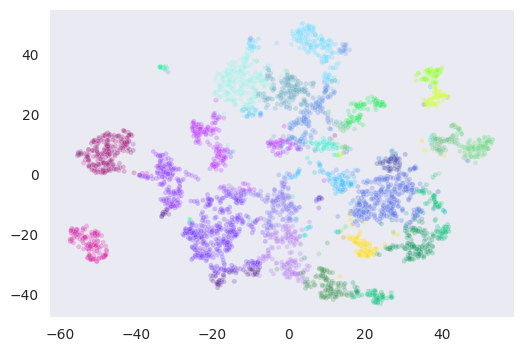

time: 9.64 s (started: 2022-09-30 14:55:20 -07:00)


In [29]:
_ = tsne_unif15.run("lamanno2020-pca50")

The answer would seem to be "no".